In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
import pickle
import joblib

## First look at the data

by looking at how the data we can notice that all the features needs to be split by semi column (;) and that the target is either "yes" or "no"

In [2]:
df_train = pd.read_csv("./binary_classifier_data/training.csv", index_col=None)
df_train.head()

,,,"variable1;""variable2"";""variable3"";""variable4"";""variable5"";""variable6"";""variable7"";""variable8"";""variable9"";""variable10"";""variable11"";""variable12"";""variable13"";""variable14"";""variable15"";""variable17"";""variable18"";""variable19"";""classLabel"""
a;17,92;5,"4e-05;""u"";""g"";""c"";""v"";1","75;""f"";""t"";1;""t"";""g"";80;5;8e+05;""t"";0;""no."""
b;16,92;3,"35e-05;""y"";""p"";""k"";""v"";0","29;""f"";""f"";0;""f"";""s"";200;0;2e+06;NA;0;""no."""
b;31,25;0,"0001125;""u"";""g"";""ff"";""ff"";0;""f"";""t"";1;""f"";""g"";96;19;960000;""t"";0;""no.""",NaN
a;48,17;0,"0001335;""u"";""g"";""i"";""o"";0","335;""f"";""f"";0;""f"";""g"";0;120;0;NA;0;""no."""
b;32,33;0,"00035;""u"";""g"";""k"";""v"";0","5;""f"";""f"";0;""t"";""g"";232;0;2320000;""f"";0;""no."""


In [3]:
def listToString(s):  
    '''
    takes a list and returns a concatenated string
    ['hello','world'] -> helloworld
    '''
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:
        if type(ele) != str:
            ele = str(ele)
        str1 += ele   
    
    # return string   
    return str1 

In [4]:
def load_and_clean_csv(file):
    '''
    This function concatentates all rows into one string and then splits them by (;)
    and returns an organized dataframe
    '''
    df = pd.read_csv(file, index_col=None)
    columnsList = []
    
    for col in df.columns: 
        columnsList.append(col)
        
    newCols = []
    for col in columnsList:
        newCols = col.split(";")
    
    for i in range(len(newCols)):
        if newCols[i][0] == '"':
            newCols[i] = newCols[i][1:-1]
            
    concatList = []
    for index, row in df.iterrows():
        newRow1 = row[0]
        newRow2 = listToString(list(index))
        newRow=str(newRow2)+str(newRow1)
        concatList.append(newRow)
    
    newRow = []
    for row in concatList:
        newRow.append(row.split(";"))
    
    newDF = pd.DataFrame(newRow, columns = newCols)
    
    return newDF

In [5]:
def clean_values(newDF):
    '''
    This function cleans the data inside the datafarm ie: removes the double qoutations from strings
    and turns stringfied ints and floats into actual ints and floats
    
    it also replaces all "NA" values with NaN and deletes all the rows that has NaNs
    '''
    for i in range(len(newDF['variable1'])):
        #variable2
        if newDF['variable2'][i] != 'NA':
            newDF['variable2'][i] = int(newDF['variable2'][i])
               
        #variable3
        if newDF['variable3'][i] != 'NA':           
            if "e" in newDF['variable3'][i]:
                newDF['variable3'][i] = float(newDF['variable3'][i])
            else:
                newDF['variable3'][i] = newDF['variable3'][i][0] + "." + newDF['variable3'][i][1:]
               
        #variable4
        if newDF['variable4'][i] != 'NA':
            newDF['variable4'][i] = newDF['variable4'][i][1:-1]
               
        #variable5
        if newDF['variable5'][i] != 'NA':
            newDF['variable5'][i] = newDF['variable5'][i][1:-1]
               
        #variable6
        if newDF['variable6'][i] != 'NA':
            newDF['variable6'][i] = newDF['variable6'][i][1:-1]
               
        #variable7
        if newDF['variable7'][i] != 'NA':
            newDF['variable7'][i] = newDF['variable7'][i][1:-1]
               
        #variable8
        if newDF['variable8'][i] != 'NA':
            newDF['variable8'][i] = int(newDF['variable8'][i])
               
        #variable9
        if newDF['variable9'][i] != 'NA':
            newDF['variable9'][i] = newDF['variable9'][i][1:-1]
               
        #variable10
        if newDF['variable10'][i] != 'NA':
            newDF['variable10'][i] = newDF['variable10'][i][1:-1]
               
        #variable11
        if newDF['variable11'][i] != 'NA':
            newDF['variable11'][i] = int(newDF['variable11'][i])
               
        #variable12
        if newDF['variable12'][i] != 'NA':
            newDF['variable12'][i] = newDF['variable12'][i][1:-1]
               
        #variable13
        if newDF['variable13'][i] != 'NA':
            newDF['variable13'][i] = newDF['variable13'][i][1:-1]
               
        #variable14
        if newDF['variable14'][i] != 'NA':
            newDF['variable14'][i] = int(newDF['variable14'][i])
               
        #variable15
        if newDF['variable15'][i] != 'NA':
            newDF['variable15'][i] = int(newDF['variable15'][i])
        #variable17
        if newDF['variable17'][i] != 'NA':
            newDF['variable17'][i] = float(newDF['variable17'][i])
        #variable18
        if newDF['variable18'][i] != 'NA':
            newDF['variable18'][i] = newDF['variable18'][i][1:-1]
        #variable19
        if newDF['variable19'][i] != 'NA':
            newDF['variable19'][i] = int(newDF['variable19'][i])
        #classLabel
        if newDF['classLabel'][i] != 'NA':
            if "yes" in newDF['classLabel'][i]:
                   newDF['classLabel'][i] = newDF['classLabel'][i][1:4]
            if "no" in newDF['classLabel'][i]:
                   newDF['classLabel'][i] = newDF['classLabel'][i][1:3]
                    
    nan_value = float("NaN")
    
    numerical_cols = ["variable2", "variable3", "variable8", "variable11", "variable14", "variable15", "variable17"]
    for col in numerical_cols:
        newDF.replace({col: "NA"}, nan_value, inplace=True)
    #newDF.replace("NA", nan_value, inplace=True)
    #newDF.dropna(inplace = True)
    newDF.dropna(subset = numerical_cols, inplace=True)
    #newDF.dropna(subset = ["variable2"], inplace=True)
    #newDF.dropna(subset = ["variable3"], inplace=True)
    #newDF.dropna(subset = ["variable8"], inplace=True)
    #newDF.dropna(subset = ["variable11"], inplace=True)
    #newDF.dropna(subset = ["variable14"], inplace=True)
    #newDF.dropna(subset = ["variable15"], inplace=True)
    #newDF.dropna(subset = ["variable17"], inplace=True)
    newDF.reset_index(drop=True, inplace=True)
    
    return newDF

In [6]:
df_train = load_and_clean_csv("./binary_classifier_data/training.csv")
df_val = load_and_clean_csv("./binary_classifier_data/validation.csv")

In [7]:
df_train = clean_values(df_train)
df_val = clean_values(df_val)

In [8]:
df_val

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,3233.0,0.00075,u,g,e,bb,1585,t,f,0,t,s,420.0,0,4200000.0,NA,1,no
1,b,2358.0,0.000179,u,g,c,v,54,f,f,0,t,g,136.0,1,1360000.0,NA,0,no
2,b,3642.0,0.00075,y,p,d,v,585,f,f,0,f,g,240.0,3,2400000.0,NA,1,no
3,b,1842.0,0.0010415,y,p,aa,v,125,t,f,0,f,g,120.0,375,1200000.0,NA,0,no
4,b,245.0,0.0013335,y,p,aa,v,4,f,f,0,t,g,120.0,475,1200000.0,f,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,b,2308.0,0.00115,u,g,i,v,35,t,t,9,f,g,56.0,742,560000.0,t,0,yes
190,a,5708.0,0.00195,u,g,c,v,55,t,t,7,f,g,0.0,3000,0.0,NA,1,yes
191,b,3083.0,0.,u,g,W,v,125,t,t,1,f,g,202.0,0,2020000.0,NA,0,yes
192,b,1967.0,0.00375,u,g,q,v,2,t,t,2,t,g,80.0,0,800000.0,t,1,yes


In [9]:
label_cols = ["variable1", "variable4", "variable5", "variable6", "variable7","variable9","variable10","variable12", "variable13", "variable18", "classLabel"]

## Label Encoding Categorical Features and Normalizing the Data

In [10]:
le = preprocessing.LabelEncoder()
all_labels = []
for col in label_cols:
    print(df_train[col].unique())
    all_labels.append(df_train[col].unique())

all_labels = np.concatenate(all_labels, axis=0)
all_labels = np.unique(all_labels)
all_labels = np.sort(all_labels)
le.fit(all_labels)

for col in label_cols:
    df_train[col] = le.transform(df_train[col])
    df_val[col] = le.transform(df_val[col])


['a' 'b' 'NA']
['u' 'y' 'l']
['g' 'p' 'gg']
['c' 'k' 'ff' 'i' 'j' 'q' 'W' 'd' 'm' 'cc' 'aa' 'r' 'x' 'e' 'NA']
['v' 'ff' 'o' 'h' 'j' 'bb' 'n' 'z' 'NA' 'dd']
['f' 't']
['t' 'f']
['t' 'f']
['g' 's' 'p']
['t' 'NA' 'f']
['no' 'yes']


In [11]:
df_train

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,2,1792.0,0.00054,29,13,6,30,175,11,28,1,28,13,80.0,5,800000.0,28,0,22
1,4,1692.0,0.00335,32,24,18,30,29,11,11,0,11,27,200.0,0,2000000.0,0,0,22
2,4,3125.0,0.0001125,29,13,12,12,0,11,28,1,11,13,96.0,19,960000.0,28,0,22
3,2,4817.0,0.0001335,29,13,16,23,335,11,11,0,11,13,0.0,120,0.0,0,0,22
4,4,3233.0,0.00035,29,13,18,30,5,11,11,0,28,13,232.0,0,2320000.0,11,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,4,255.0,0.00375,29,13,20,30,25,28,28,3,11,13,260.0,15108,2600000.0,28,1,33
3558,2,235.0,0.0009,29,13,25,30,85,28,28,5,28,13,120.0,0,1200000.0,28,1,33
3559,4,3417.0,0.000917,29,13,6,30,45,28,28,12,28,13,0.0,221,0.0,0,1,33
3560,4,2783.0,0.000154,29,13,1,30,375,28,28,5,28,13,100.0,3,1000000.0,0,1,33


In [12]:
df_val

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,4,3233.0,0.00075,29,13,10,5,1585,28,11,0,28,27,420.0,0,4200000.0,0,1,22
1,4,2358.0,0.000179,29,13,6,30,54,11,11,0,28,13,136.0,1,1360000.0,0,0,22
2,4,3642.0,0.00075,32,24,8,30,585,11,11,0,11,13,240.0,3,2400000.0,0,1,22
3,4,1842.0,0.0010415,32,24,3,30,125,28,11,0,11,13,120.0,375,1200000.0,0,0,22
4,4,245.0,0.0013335,32,24,3,30,4,11,11,0,28,13,120.0,475,1200000.0,11,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,4,2308.0,0.00115,29,13,16,30,35,28,28,9,11,13,56.0,742,560000.0,28,0,33
190,2,5708.0,0.00195,29,13,6,30,55,28,28,7,11,13,0.0,3000,0.0,0,1,33
191,4,3083.0,0.,29,13,1,30,125,28,28,1,11,13,202.0,0,2020000.0,0,0,33
192,4,1967.0,0.00375,29,13,25,30,2,28,28,2,28,13,80.0,0,800000.0,28,1,33


In [13]:
min_max_scaler = preprocessing.MinMaxScaler()

train_values = df_train.values #returns a numpy array
train_values_scaled = min_max_scaler.fit_transform(train_values)
df_train = pd.DataFrame(train_values_scaled, columns=df_train.columns)
    
val_values = df_val.values #returns a numpy array
#val_values_scaled = min_max_scaler.fit_transform(val_values)
val_values_scaled = min_max_scaler.transform(val_values)
df_val = pd.DataFrame(val_values_scaled, columns=df_val.columns)


# Data Exploration

After training the data I noticed that the training did great at the training dataset but failed to predict when it came to the validation dataset.

So after exploring the data for a little bit I saw that the data used to overfit because the target follows exactly variable19 in the training set but does nearly the opposite in the validation set.

Which made the model give extra attention to variable19 for its training. while in reality it is irrelevant for data and prevents our model from looking at the other variables.

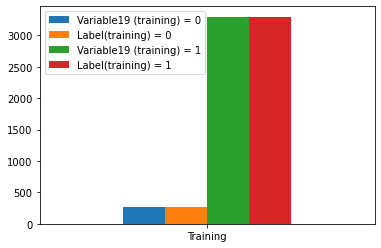

In [14]:
index = ["Training"]
df1 = pd.DataFrame({"Variable19 (training) = 0": df_train['variable19'].value_counts()[0],
                   'Label(training) = 0': df_train['classLabel'].value_counts()[0],
                   "Variable19 (training) = 1": df_train['variable19'].value_counts()[1],
                   'Label(training) = 1': df_train['classLabel'].value_counts()[1],
                   }, index=index)

ax = df1.plot.bar(rot=0)

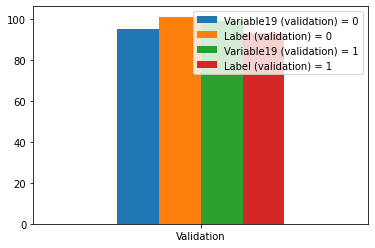

In [15]:
index = ["Validation"]
df1 = pd.DataFrame({"Variable19 (validation) = 0": df_val['variable19'].value_counts()[0],
                   'Label (validation) = 0': df_val['classLabel'].value_counts()[0],
                   "Variable19 (validation) = 1": df_val['variable19'].value_counts()[1],
                   'Label (validation) = 1': df_val['classLabel'].value_counts()[1],
                   }, index=index)

ax = df1.plot.bar(rot=0)

### So we simply drop'Variable19'

In [16]:
df_train = df_train.drop("variable19", axis=1)
df_val = df_val.drop("variable19", axis=1)

In [17]:
from sklearn.model_selection import train_test_split

X= df_train.drop("classLabel", axis=1)
y = df_train["classLabel"]

X_val = df_val.drop("classLabel", axis=1)
y_val = df_val["classLabel"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2849, 17), (2849,), (713, 17), (713,))

In [19]:
X_val.shape, y_val.shape

((194, 17), (194,))

# Trying out different ML models

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
#y_pred_val = logreg.predict(X_val)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
#acc_log = round(logreg.score(X_test, y_pred) * 100, 2)
acc_log_val = round(logreg.score(X_val, y_val) * 100, 2)
print("Accuracy:" + str(acc_log))
print("Validation Accuracy " + str(acc_log_val))

Accuracy:95.4
Validation Accuracy 65.46


In [21]:
svc = SVC()
svc.fit(X_train, y_train)

#y_pred = svc.predict(X_test)
#y_pred_val = svc.predict(X_val)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc_val = round(svc.score(X_val, y_val) * 100, 2)

print("Accuracy:" + str(acc_svc))
print("Validation Accuracy " + str(acc_svc_val))

Accuracy:97.3
Validation Accuracy 73.71


In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

#y_pred = knn.predict(X_test)
#y_pred_val = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn_val = round(knn.score(X_val, y_val) * 100, 2)

print("Accuracy:" + str(acc_knn))
print("Validation Accuracy " + str(acc_knn_val))

Accuracy:98.77
Validation Accuracy 81.96


In [23]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

#y_pred = gaussian.predict(X_test)
#y_pred_val = gaussian.predict(X_val)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian_val = round(gaussian.score(X_val, y_val) * 100, 2)


print("Accuracy:" + str(acc_gaussian))
print("Validation Accuracy " + str(acc_gaussian_val))

Accuracy:78.2
Validation Accuracy 86.08


In [24]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

#y_pred = perceptron.predict(X_test)
#y_val = perceptron.predict(X_val)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron_val = round(perceptron.score(X_val, y_val) * 100, 2)


print("Accuracy:" + str(acc_perceptron))
print("Validation Accuracy " + str(acc_perceptron_val))

Accuracy:92.91
Validation Accuracy 78.87


In [25]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)
y_pred_val = linear_svc.predict(X_val)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc_val = round(linear_svc.score(X_val, y_val) * 100, 2)

print("Accuracy:" + str(acc_linear_svc))
print("Validation Accuracy " + str(acc_linear_svc_val))

Accuracy:95.19
Validation Accuracy 68.56


In [26]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

#y_pred = sgd.predict(X_test)
#y_pred_val = sgd.predict(X_val)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd_val = round(sgd.score(X_val, y_val) * 100, 2)

print("Accuracy:" + str(acc_sgd))
print("Validation Accuracy " + str(acc_sgd_val))

Accuracy:93.44
Validation Accuracy 76.8


In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

#y_pred = decision_tree.predict(X_test)
#y_pred_val = decision_tree.predict(X_val)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree_val = round(decision_tree.score(X_val, y_val) * 100, 2)

print("Accuracy:" + str(acc_decision_tree))
print("Validation Accuracy " + str(acc_decision_tree_val))

Accuracy:100.0
Validation Accuracy 80.93


In [28]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

#y_pred = random_forest.predict(X_test)
#y_pred_val = random_forest.predict(X_val)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Accuracy:" + str(acc_random_forest))

random_forest.score(X_val, y_val)
acc_random_forest_val = round(random_forest.score(X_val, y_val) * 100, 2)
print("Validation Accuracy:" + str(acc_random_forest_val))



Accuracy:100.0
Validation Accuracy:88.66


In [29]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree],
    'val_Score': [acc_svc_val, acc_knn_val, acc_log_val, 
              acc_random_forest_val, acc_gaussian_val, acc_perceptron_val, 
              acc_sgd_val, acc_linear_svc_val, acc_decision_tree_val]})
models.sort_values(by='val_Score', ascending=False)

,Model,Score,val_Score
3,Random Forest,100.00,88.66
4,Naive Bayes,78.20,86.08
1,KNN,98.77,81.96
8,Decision Tree,100.00,80.93
5,Perceptron,92.91,78.87
6,Stochastic Gradient Decent,93.44,76.80
0,Support Vector Machines,97.30,73.71
7,Linear SVC,95.19,68.56
2,Logistic Regression,95.40,65.46


# Building an Ensemble

In [30]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
#kfold = model_selection.KFold(n_splits=10, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = SVC()
estimators.append(('svc', model2))

model3 = KNeighborsClassifier(n_neighbors = 3)
estimators.append(('knn', model3))

model4 = GaussianNB()
estimators.append(('gaussian', model4))

model5 = Perceptron()
estimators.append(('perceptron', model5))

model6 = LinearSVC()
estimators.append(('linear_svc', model6))

model7 = SGDClassifier()
estimators.append(('sgd', model7))

model8 = DecisionTreeClassifier()
estimators.append(('dtc', model8))

model9 = RandomForestClassifier(n_estimators=100)
estimators.append(('rfc', model9))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
preds = ensemble.predict(X_val)

acc = accuracy_score(y_val, preds)
l_loss = log_loss(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy is: " + str(round(acc * 100, 2)))

print("Log Loss is: " + str(l_loss))
print("F1 Score is: " + str(f1))

Accuracy is: 81.44
Log Loss is: 6.4093934893401086
F1 Score is: 0.8333333333333334


In [31]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[17]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)])

    #optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile( loss='mse',optimizer="adam", metrics=['accuracy'])
    
    return model

In [32]:
model = build_model()

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________


In [34]:
EPOCHS = 200

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
#X_train = np.expand_dims(X_train, -1)
#y_train   = np.expand_dims(y_train, -1)


history = model.fit(X_train, y_train,epochs=EPOCHS,validation_data=(X_val, y_val), verbose=1)

#history = model.fit(X_train, y_train,epochs=EPOCHS,validation_split=0.2, verbose=1)

Train on 2849 samples, validate on 194 samples
Epoch 1/200
2849/2849 [==============================] - 1s 369us/sample - loss: 0.1039 - accuracy: 0.8589 - val_loss: 0.2525 - val_accuracy: 0.5515
Epoch 2/200
2849/2849 [==============================] - 0s 80us/sample - loss: 0.0406 - accuracy: 0.9509 - val_loss: 0.2121 - val_accuracy: 0.7371
Epoch 3/200
2849/2849 [==============================] - 0s 79us/sample - loss: 0.0344 - accuracy: 0.9596 - val_loss: 0.1842 - val_accuracy: 0.7732
Epoch 4/200
2849/2849 [==============================] - 0s 82us/sample - loss: 0.0308 - accuracy: 0.9684 - val_loss: 0.1874 - val_accuracy: 0.7732
Epoch 5/200
2849/2849 [==============================] - 0s 81us/sample - loss: 0.0269 - accuracy: 0.9754 - val_loss: 0.1616 - val_accuracy: 0.7990
Epoch 6/200
2849/2849 [==============================] - 0s 91us/sample - loss: 0.0242 - accuracy: 0.9765 - val_loss: 0.1669 - val_accuracy: 0.8041
Epoch 7/200
2849/2849 [==============================] - 0s 83us

Epoch 56/200
2849/2849 [==============================] - 0s 54us/sample - loss: 0.0037 - accuracy: 0.9965 - val_loss: 0.1839 - val_accuracy: 0.8093
Epoch 57/200
2849/2849 [==============================] - 0s 50us/sample - loss: 0.0082 - accuracy: 0.9951 - val_loss: 0.1664 - val_accuracy: 0.8041
Epoch 58/200
2849/2849 [==============================] - 0s 62us/sample - loss: 0.0037 - accuracy: 0.9965 - val_loss: 0.1563 - val_accuracy: 0.8402
Epoch 59/200
2849/2849 [==============================] - 0s 54us/sample - loss: 0.0044 - accuracy: 0.9965 - val_loss: 0.1605 - val_accuracy: 0.8299
Epoch 60/200
2849/2849 [==============================] - 0s 54us/sample - loss: 0.0040 - accuracy: 0.9968 - val_loss: 0.1604 - val_accuracy: 0.8196
Epoch 61/200
2849/2849 [==============================] - 0s 64us/sample - loss: 0.0032 - accuracy: 0.9975 - val_loss: 0.1606 - val_accuracy: 0.8351
Epoch 62/200
2849/2849 [==============================] - 0s 52us/sample - loss: 0.0029 - accuracy: 0.9975

Epoch 111/200
2849/2849 [==============================] - 0s 52us/sample - loss: 9.1685e-04 - accuracy: 0.9993 - val_loss: 0.1681 - val_accuracy: 0.8299
Epoch 112/200
2849/2849 [==============================] - 0s 60us/sample - loss: 8.0364e-04 - accuracy: 0.9993 - val_loss: 0.1663 - val_accuracy: 0.8299
Epoch 113/200
2849/2849 [==============================] - 0s 57us/sample - loss: 0.0012 - accuracy: 0.9993 - val_loss: 0.1667 - val_accuracy: 0.8299
Epoch 114/200
2849/2849 [==============================] - 0s 54us/sample - loss: 0.0014 - accuracy: 0.9993 - val_loss: 0.1606 - val_accuracy: 0.8351
Epoch 115/200
2849/2849 [==============================] - 0s 62us/sample - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.1662 - val_accuracy: 0.8299
Epoch 116/200
2849/2849 [==============================] - 0s 53us/sample - loss: 0.0011 - accuracy: 0.9993 - val_loss: 0.1627 - val_accuracy: 0.8299
Epoch 117/200
2849/2849 [==============================] - 0s 54us/sample - loss: 8.1306e-04

2849/2849 [==============================] - 0s 58us/sample - loss: 5.9867e-04 - accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 0.8299
Epoch 165/200
2849/2849 [==============================] - 0s 52us/sample - loss: 5.2897e-04 - accuracy: 1.0000 - val_loss: 0.1622 - val_accuracy: 0.8247
Epoch 166/200
2849/2849 [==============================] - 0s 63us/sample - loss: 7.4638e-04 - accuracy: 1.0000 - val_loss: 0.1653 - val_accuracy: 0.8247
Epoch 167/200
2849/2849 [==============================] - 0s 54us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1625 - val_accuracy: 0.8247
Epoch 168/200
2849/2849 [==============================] - 0s 53us/sample - loss: 8.9916e-04 - accuracy: 1.0000 - val_loss: 0.1630 - val_accuracy: 0.8247
Epoch 169/200
2849/2849 [==============================] - 0s 64us/sample - loss: 4.5478e-04 - accuracy: 1.0000 - val_loss: 0.1588 - val_accuracy: 0.8247
Epoch 170/200
2849/2849 [==============================] - 0s 62us/sample - loss: 3.6038e-04 -

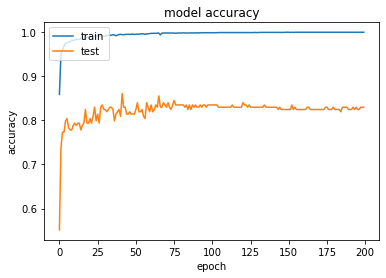

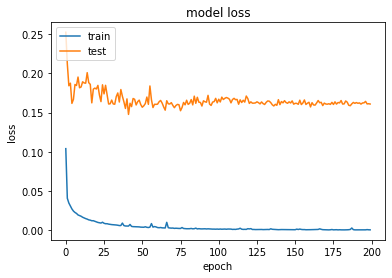

In [35]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
#Save Random Forest since it gave us the best results
filename = 'finalized_model.sav'
pickle.dump(random_forest, open(filename, 'wb'))

In [37]:
"""
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
"""

"\n# load the model from disk\nloaded_model = pickle.load(open(filename, 'rb'))\nresult = loaded_model.score(X_test, Y_test)\nprint(result)\n"

In [38]:
np.save('classes.npy', le.classes_)

In [39]:
#encoder = LabelEncoder()
#encoder.classes_ = numpy.load('classes.npy')

In [40]:
joblib.dump(min_max_scaler, "scaler.save")

['scaler.save']

In [41]:
#scaler = joblib.load("scaler.save")